# Evaluate Neural Network

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Model and Test Data

In [64]:
from tensorflow.keras.models import load_model

%store -r x_test
%store -r y_test
%store -r model_name
%store -r classes

model_name = 'Deep_FLAI_7'

model = load_model(f'./{model_name}.h5')

## Performance on Test Data

In [65]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'++++++++++++ Test data ++++++++++++\nloss={loss:.4f} acc={acc:.4f}')

++++++++++++ Test data ++++++++++++
loss=0.4206 acc=0.8529


## Confusion Matrix

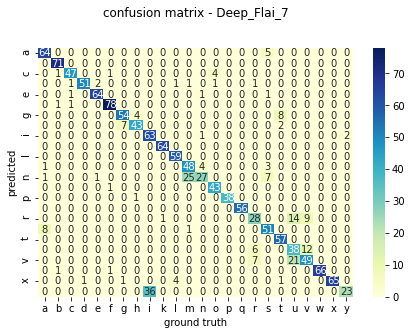

In [66]:
from sklearn import metrics
import seaborn as sns

predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions, axis=-1)

gt_classes = np.argmax(y_test, axis=-1)
confusion_matrix = metrics.confusion_matrix(gt_classes, prediction_classes)

sns.heatmap(pd.DataFrame(confusion_matrix, index=classes, columns=classes), annot=True, cmap="YlGnBu", fmt='d')
plt.tight_layout()
plt.title('confusion matrix - ' + model.name, y=1.1)
plt.ylabel('predicted')
plt.xlabel('ground truth')
plt.show()